In [1]:
import sys
sys.path.insert(0, "..")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from src.utils import load_mammoth_data
from src.laplacian_eigenmaps import LaplacianEigenmaps

In [17]:
data_raw = load_mammoth_data()
# Remove 99,5% of the points in the dataset randomly
n = len(data_raw) * 0.005

# Create vector of random indices
random_indices = np.random.choice(len(data_raw), size=int(n), replace=False)
data = data_raw[random_indices]
print(data.shape)

Loading Mammoth 3D dataset...
Data shape: (999778, 3)
(4998, 3)


In [18]:
colors = data[:, 2] # Color by Z-axis value

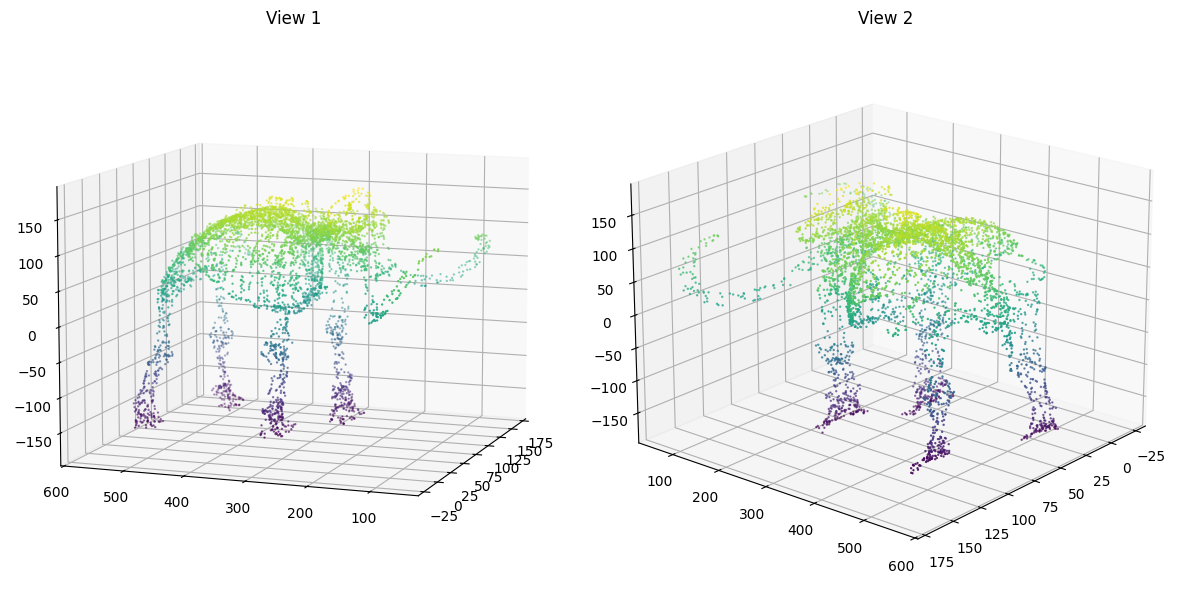

In [19]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
sc1 = ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, 2], cmap='viridis', s=0.5)
ax1.set_title("View 1")
ax1.view_init(elev=10, azim=200)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc2 = ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, 2], cmap='viridis', s=0.5)
ax2.set_title("View 2")
ax2.view_init(elev=20, azim=40)

plt.tight_layout()
plt.show()

In [ ]:
# Perform dimensionality reduction using Laplacian Eigenmap, without UMAP
k=10
le = LaplacianEigenmaps(
    n_components=2,
    n_neighbors=k,
    weight='binary',
    )
embedding_le = le.fit_transform(data)

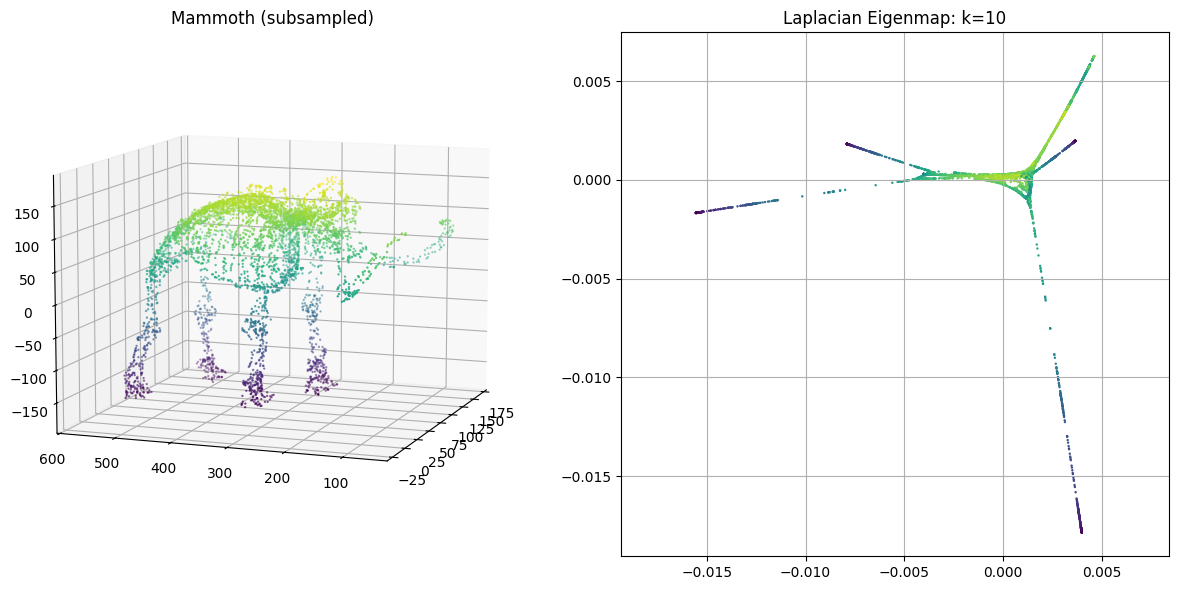

In [ ]:
# Plot original 3D data and 2D embedding side by side
fig = plt.figure(figsize=(12, 6))

ax_mam = fig.add_subplot(1, 2, 1, projection='3d')
ax_mam.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap='viridis', s=0.5)
ax_mam.set_title("Mammoth (subsampled)")
ax_mam.view_init(elev=10, azim=200)

ax_embed = fig.add_subplot(1, 2, 2)
ax_embed.scatter(embedding_le[:, 0], embedding_le[:, 1], c=colors, cmap='viridis', s=0.5)
ax_embed.set_title(f"Laplacian Eigenmap: k={k}", fontsize=12)
ax_embed.set_aspect('equal', 'datalim')
ax_embed.grid(True)

plt.tight_layout()
plt.show()